Problem Understanding (for report)

The price of a used car depends on multiple factors such as brand, year of manufacture, fuel type, transmission, and distance driven.
This project aims to build a machine learning regression model to predict the selling price of a car based on these features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv(r"C:\Users\aarav\OneDrive\Pictures\car_price_prediction\car data.csv")  


In [4]:
df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.drop('Car_Name', axis=1, inplace=True) #not useful for prediction

In [6]:
df['Car_Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [7]:
le = LabelEncoder()

df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])


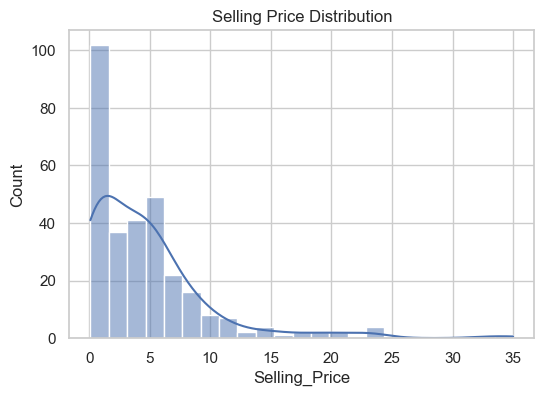

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()


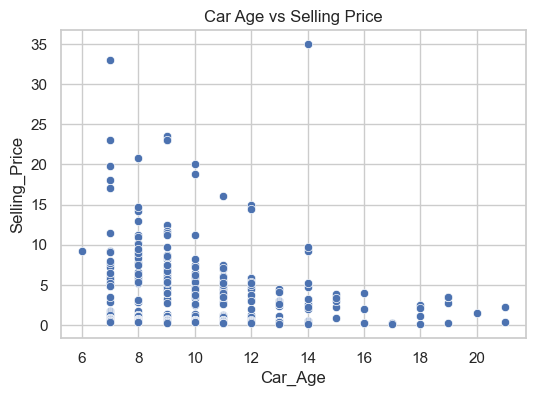

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Car_Age'], y=df['Selling_Price'])
plt.title("Car Age vs Selling Price")
plt.show()


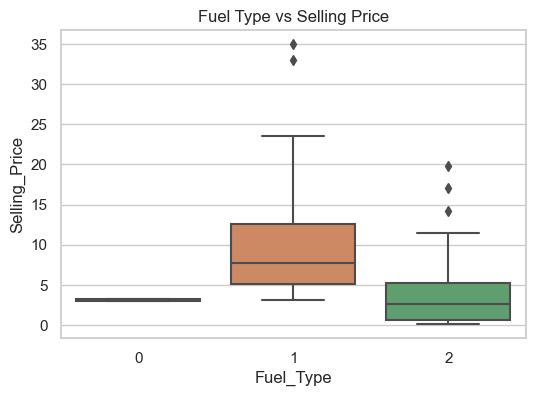

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Fuel Type vs Selling Price")
plt.show()


In [11]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.6389196721311476
RMSE: 0.9686468632776881
R2 Score: 0.9592683769360726


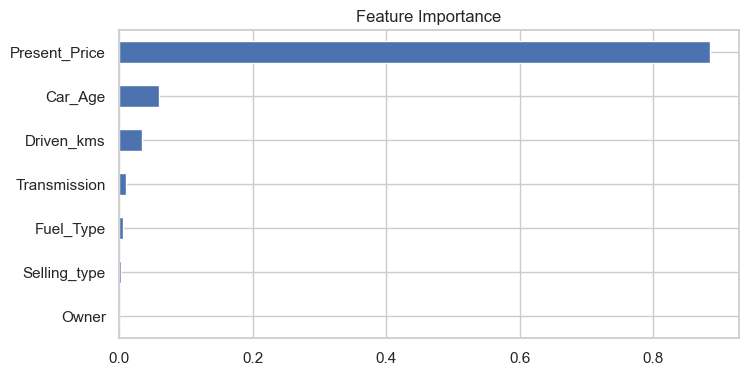

In [15]:
importances = model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values()

feat_imp.plot(kind='barh', figsize=(8,4))
plt.title("Feature Importance")
plt.show()


Conclusion

A Random Forest regression model was successfully built to predict car prices.
Feature engineering such as car age significantly improved model performance.
The model can assist buyers and sellers in estimating fair car prices.